# Finite Differences

**강좌**: *수치해석 프로젝트*

## Taylor Expansion

Taylor series를 이용하면 함수를 쉽게 근사화 할 수 있다.

$$
f(x_j+\Delta x) = f(x_j)  + \Delta x f'(x_j) + \frac{(\Delta x)^2}{2} f''(x_j) + \frac{(\Delta x)^3}{3!} f'''(x_j) + T.E.
$$

여기서 $T.E$ 는 Truncation error 이다. 만약 1차 미분까지만으로 근사화 한 경우 이 오차는 $(\Delta x)^2, (\Delta x)^3, ...$ 과 같이 간격 $\Delta x$ 의 고차 항으로 구성되어 있다.

$$
T.E. = Error((\Delta x)^2, (\Delta x)^3, ...) = O((\Delta x)^2)
$$

$\Delta x$ 가 작은 경우 오차는 Leading error 항과 그보다 매우 작은 항의 합이다. 

## 수치 미분
Taylor expansion 을 이용하면 수치 미분을 구할 수 있다.

- Forward Difference

$$
f'(x_j) = \frac{f(x_{j+1}) - f(x_j)}{\Delta x} + O(\Delta x)
$$

- Backward Differnce

$$
f'(x_j) = \frac{f(x_{j}) - f(x_{j-1})}{\Delta x} + O(\Delta x)
$$

- Central Difference
  - 다음 두 식을 빼보자.
  
$$
f(x_{j+1}) = f(x_j)  + \Delta x f'(x_j) + \frac{(\Delta x)^2}{2} f''(x_j) + \frac{(\Delta x)^3}{3!} f'''(x_j) + O((\Delta x)^2)
$$
$$
f(x_{j-1}) = f(x_j)  - \Delta x f'(x_j) + \frac{(\Delta x)^2}{2} f''(x_j) - \frac{(\Delta x)^3}{3!} f'''(x_j) + O((\Delta x)^3)
$$

   - 그 결과는 다음과 같다.
   
$$
f'(x_j) = \frac{f(x_{j+1}) - f(x_{j-1})}{ 2\Delta x} + O((\Delta x)^2)
$$

- 2차 미분
   - 위의 두 식을 더한 후 $2 f(x_j)$ 를 빼보자.
   
$$
f''(x_j) = \frac{f(x_{j+1}) + 2 f(x_j) - f(x_{j-1})}{ (\Delta x)^2} + O((\Delta x)^2)
$$   

- 일반적인 방법
   - 여러 Taylor expansion의 합차를 이용해서 원하는 미분항의 근사식을 구한다.
   

### 예제
$f(x)=\sin(x)$ 에 대해서 수치 미분 결과를 비교하자.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 150

In [2]:
def forward_diff(f, x, dx):
    # Forward difference
    return (f(x+dx) - f(x)) / dx

def backward_diff(f, x, dx):
    # Backward difference
    return (f(x) - f(x-dx)) / dx

def central_diff(f, x, dx):
    # Central difference
    return (f(x+dx) - f(x-dx)) / (2*dx)

In [3]:
def compute(dx):
    x = np.linspace(0, 2*np.pi, 101)
    f = np.sin

    # Compute first derivatives
    exact = np.cos(x)
    fd = np.array([forward_diff(f, xi, dx) for xi in x])
    bd = np.array([backward_diff(f, xi, dx) for xi in x])
    cd = np.array([central_diff(f, xi, dx) for xi in x])
    
    return x, exact, fd, bd, cd

def plot(dx):
    x, exact, fd, bd, cd = compute(dx)

    # Plot
    plt.plot(x , exact)
    plt.plot(x, fd)
    plt.plot(x, bd)
    plt.plot(x, cd)

    plt.legend(['Exact', 'Forward Difference', 'Backward Difference', 'Central Difference'])
    plt.xlabel(r'x')
    plt.ylabel(r"$f'(x)$")
    plt.title("Comparison of finite difference @ $\Delta x$={} $\pi$".format(dx/np.pi))

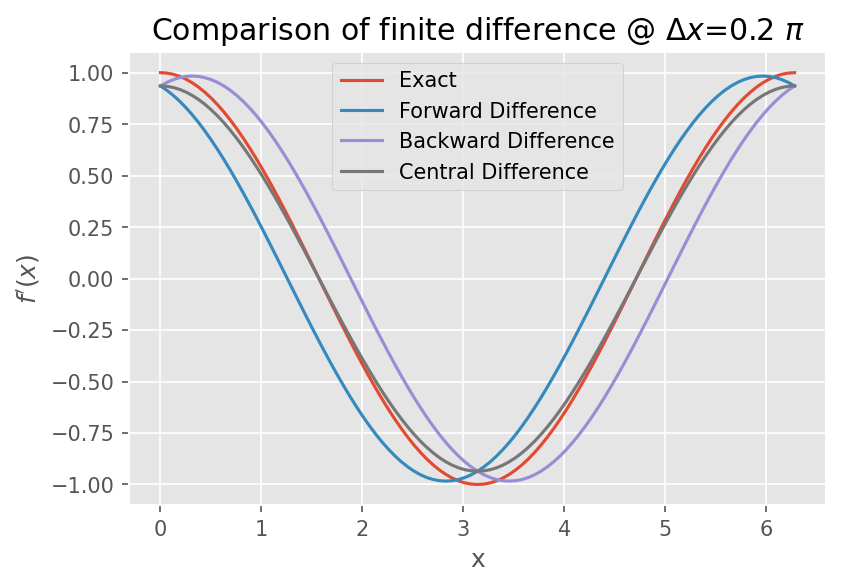

In [4]:
plot(0.2*np.pi)

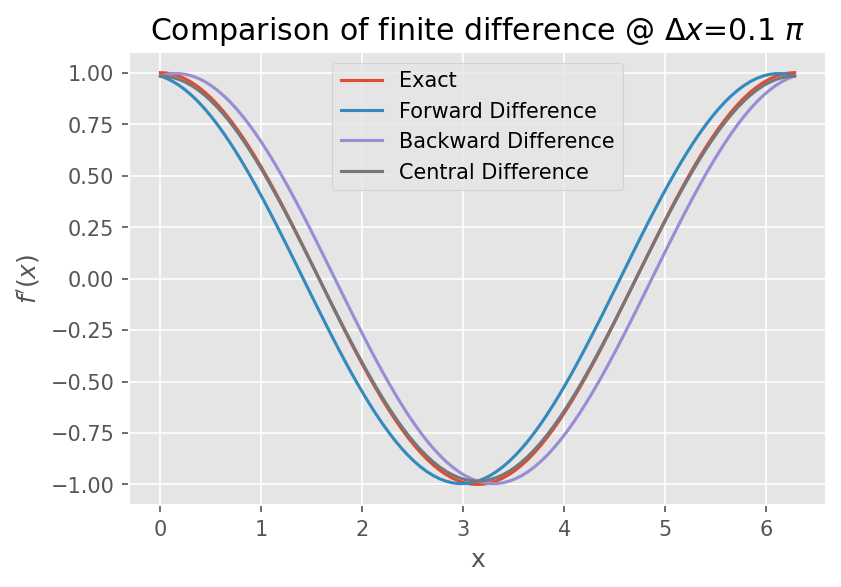

In [5]:
plot(0.1*np.pi)

## 정확도 비교
- Forward / Backward difference 는 1차 정확도 ($O(\Delta x)$)
- Central difference 는 2차 정확도($O((\Delta x)^2)$)

In [6]:
def error(dx):
    _, exact, fd, bd, cd = compute(dx)
    
    err_fd = np.linalg.norm(fd - exact)
    err_bd = np.linalg.norm(bd - exact)
    err_cd = np.linalg.norm(cd - exact)
    
    return err_fd, err_bd, err_cd

Text(0, 0.5, 'Error')

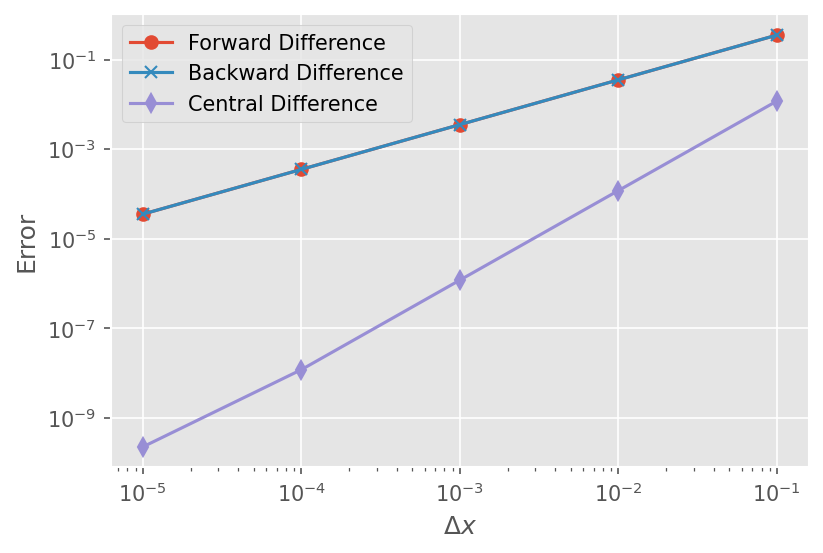

In [7]:
# Change delta x
dxs = [10**(-n) for n in range(1, 6)]

err_fd, err_bd, err_cd = [], [], []

for dx in dxs:
    fd, bd, cd = error(dx)
    
    err_fd.append(fd)
    err_bd.append(bd)
    err_cd.append(cd)    
    
# Plot error (log-log scale)
plt.loglog(dxs, err_fd, marker='o')
plt.loglog(dxs, err_bd, marker='x')
plt.loglog(dxs, err_cd, marker='d')

plt.legend(['Forward Difference', 'Backward Difference', 'Central Difference'])
plt.xlabel(r'$\Delta x$')
plt.ylabel('Error')

## Modified wavenumber

- 정확도를 평가하는 또 다른 방법

- 임의의 함수는 Fourier expansion을 이용하면 Sinusoidal 함수로 표현 가능

$$
f(x) = \sum_{n=0}^{\infty} a_n \cos(nx) + b_n \sin(nx)
$$

   * $n$ 이 커질수록 주기가 짧아짐 : High frequency
   
   * High frequency 항을 모사하기 위해서는 $\Delta x$ 를 줄이거나 정확도가 높아야 함
   
   * Finite difference 의 정확도에 따라 Low frequeny 항은 잘 모사할 수 있으나 High frequency 항은 왜곡될 수 있음

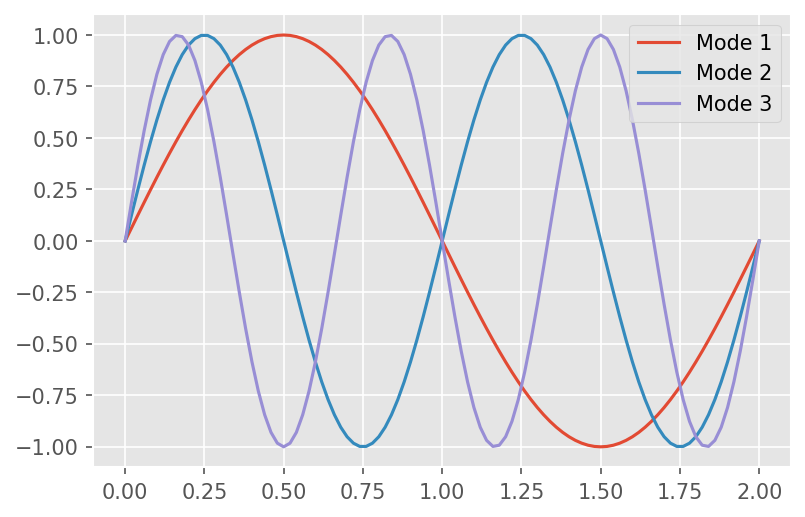

In [8]:
x = np.linspace(0, 2, 101)

legends = []
for i in range(1, 4):
    plt.plot(x, np.sin(np.pi*i*x))
    legends.append("Mode {}".format(i))
    
plt.legend(legends)

- Modified wavenumber
   * 간단한 Harmonic 함수에 대해 분석 
   
$$
f(x) = e^{ikx},
$$

   * $[0, L]$ 영역을 N개의 격자로 나누었다고 생각하자. 이때 waveumber $k$를 다음과 같이 고려하자
   
$$
k = \frac{2\pi}{L} n, ~~~n=0, 1, 2, ... \frac{N}{2}
$$

   * 이론적인 미분은
   
$$
f' = ikf
$$

   * Finite difference
      - 격자점은
      
$$
x_j = \frac{L}{N} j ~~~j=0,1,2,...,N.
$$

      - Central differnce에 대해 Harmonic 함수 적용
      
$$
f'_j = f'(x_j) = \frac{f(x_{j+1}) - f(x_{j-1})}{2\Delta x} 
= \frac{e^{2\pi n (j+1)/N} - e^{2\pi n (j-1)/N}}{2\Delta x}
= \frac{e^{2\pi n /N} - e^{2\pi n /N}}{2\Delta x} f_j
$$
$$
f'_j = i \frac{\sin(2\pi n/N)}{\Delta x} f_i = ik`f_j
$$

즉

$$
k' \Delta x = \sin(2\pi n/N) = \sin (k \Delta x)
$$

Text(0, 0.5, "k'h")

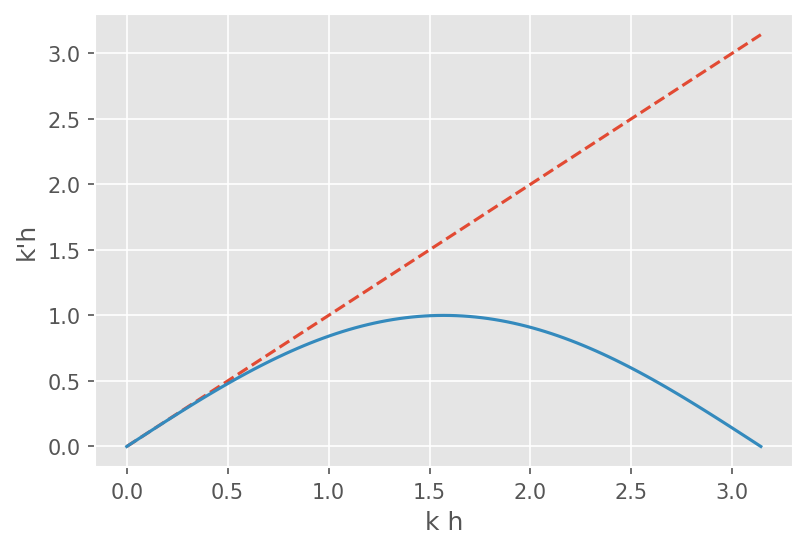

In [9]:
kh = np.linspace(0, np.pi, 101)
mkh = np.sin(kh)

plt.plot(kh, kh, linestyle='--')
plt.plot(kh, mkh)
plt.xlabel('k h')
plt.ylabel("k'h")

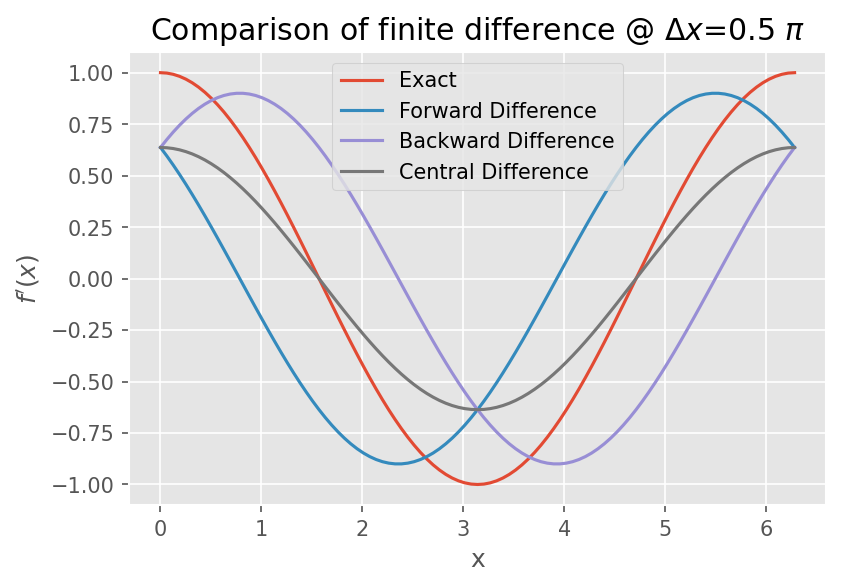

In [10]:
plot(0.5*np.pi)

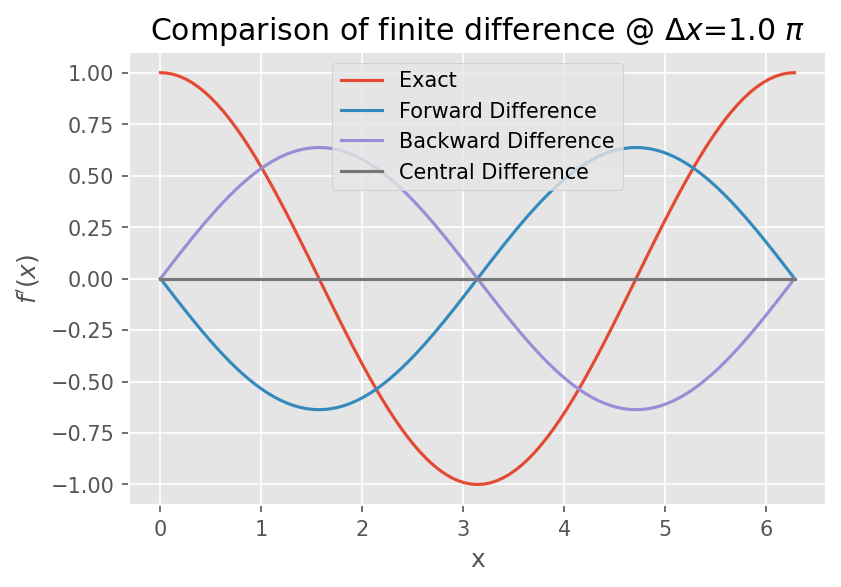

In [11]:
plot(np.pi)